# Problem Statement : 

#### The Karnataka banking client's profitability and reputation are being hit by fraudulent ATM transactions. Your job as Data Scientist is to build this fraud detection & prevention predictive model in the first step. If successful, in the 2nd step you will have to present your solutions and explain how it works to the client. The data has been made available to you.
#### The challenging part of the problem is that the data contains very few fraud instances in comparison to the overall population. To give more edge to the solution they have also collected data regarding location [geo_scores] of the transactions, their own proprietary index [Lambda_wts], on network turn around times [Qset_tats] and vulnerability qualification score [instance_scores]. As of now you don't need to understand what they mean.
#### Training data contains masked variables pertaining to each transaction id . Your prediction target here is 'Target'.
#### 1: Fraudulent transactions
#### 0: Clean transactions

## Importing Basic Libraries

In [1]:
# Basic Libarary

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

## Importing Datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_share.csv")
geo = pd.read_csv("Geo_scores.csv")
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qsets = pd.read_csv("Qset_tats.csv")

### Train Dataset

In [3]:
train.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0


In [4]:
train["id"].value_counts()

112751    1
171920    1
157009    1
211122    1
151312    1
         ..
185475    1
200674    1
36417     1
143294    1
22175     1
Name: id, Length: 227845, dtype: int64

In [5]:
print("Train Shape :", train.shape)

Train Shape : (227845, 28)


In [6]:
print("Train nunique :", train["id"].nunique())

Train nunique : 227845


### Test Dataset

In [7]:
test.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.570000,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.910000,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.86,1.006667,0.583333,0.616667,0.63,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200


In [8]:
test["id"].value_counts()

146574    1
277018    1
5089      1
208521    1
52783     1
         ..
269347    1
149835    1
51119     1
268200    1
223337    1
Name: id, Length: 56962, dtype: int64

In [9]:
print("Test Shape :", test.shape)

Test Shape : (56962, 27)


In [10]:
print("Test nunique :", test["id"].nunique())

Test nunique : 56962


### Geo Scores Dataset

In [11]:
geo.head(3)

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17


In [12]:
geo["id"].value_counts()

26674     5
149679    5
114110    5
24969     5
262179    5
         ..
152225    5
259714    5
232       5
128848    5
258558    5
Name: id, Length: 284807, dtype: int64

In [13]:
print("Geo Shape :", geo.shape)

Geo Shape : (1424035, 2)


In [14]:
print("Geo nunique :", geo["id"].nunique())

Geo nunique : 284807


### Instance Dataset

In [15]:
instance.head(3)

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44


In [16]:
instance["id"].value_counts()

173444    5
240342    5
147158    5
83677     5
127535    5
         ..
64895     5
74566     5
154634    5
235732    5
141626    5
Name: id, Length: 284807, dtype: int64

In [17]:
print("Instance Shape", instance.shape)

Instance Shape (1424035, 2)


In [18]:
print("Instance nunique :", instance["id"].nunique())

Instance nunique : 284807


### Lambdawts Dataset

In [19]:
lambdawts.head(3)

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39


In [20]:
lambdawts["Group"].value_counts()

Grp936     1
Grp1128    1
Grp341     1
Grp63      1
Grp173     1
          ..
Grp337     1
Grp649     1
Grp1183    1
Grp46      1
Grp37      1
Name: Group, Length: 1400, dtype: int64

In [21]:
print("Lambdawts Shape", lambdawts.shape)

Lambdawts Shape (1400, 2)


In [22]:
print("Lambdawts nunique :", lambdawts["Group"].nunique())

Lambdawts nunique : 1400


### Qsets Dataset

In [23]:
qsets.head(3)

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03


In [24]:
qsets["id"].value_counts()

9983      5
146106    5
133237    5
262326    5
79108     5
         ..
149081    5
183206    5
64196     5
31396     5
105301    5
Name: id, Length: 284807, dtype: int64

In [25]:
print("Qsets Shape :", qsets.shape)

Qsets Shape : (1424035, 2)


In [26]:
print("Qsets nunique :", qsets["id"].nunique())

Qsets nunique : 284807


In [27]:
print("Geo nunique :", geo["id"].nunique())
print("Instance nunique :", instance["id"].nunique())
print("Qsets nunique :", qsets["id"].nunique())
print(f'Train Shape "{train.shape[0]}" and Test Shape "{test.shape[0]}" Together is --> "{train.shape[0] + test.shape[0]}"')

Geo nunique : 284807
Instance nunique : 284807
Qsets nunique : 284807
Train Shape "227845" and Test Shape "56962" Together is --> "284807"


- Here the shape of the datasets "geo", "instance", "qsets" is 1424035 but the unique "id" are 284807 which means there are some ids which are repeated and needs to be handled in pre-processing part. 

# Pre-Processing

In [28]:
# Checking Missing Values in Train Data

train.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [29]:
# Checking Missing Values in Test Data

test.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [30]:
# Checking 5 Point Summary of Geo Scores

geo.describe()

,id,geo_score
count,1.424035e+06,1.352492e+06
mean,1.424030e+05,-9.279168e-06
std,8.221673e+04,7.827199e+00
min,0.000000e+00,-1.093900e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,1.800000e-01
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,4.581000e+01


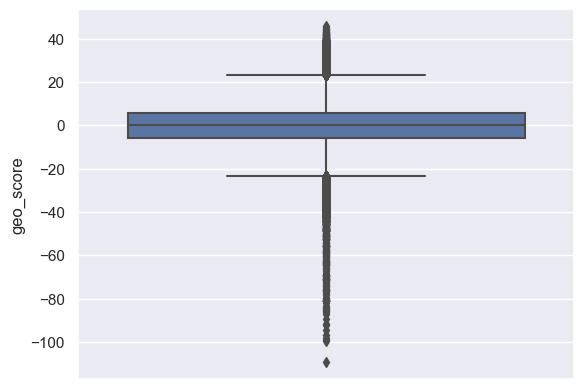

In [31]:
# Checking Outliers in Geo_scores.

sns.boxplot(y = "geo_score", data = geo)
plt.show()

In [32]:
# Checking Missing Values in Geo Scores.

print(geo.isnull().sum())
print("*" * 50)
print(geo.isnull().sum()/len(geo) *100)

id               0
geo_score    71543
dtype: int64
**************************************************
id           0.000000
geo_score    5.023964
dtype: float64


- In Geo Scores dataset, 5% of data is missing.
- Since there is 5% of data missing, we will impute the missing values instead of removing it.
- Since there are outliers in the data, we will go by median value i.e "0" to impute the missing values and also we have been told the same(impute with "0") by the Project Head.

In [33]:
# Imputing Missing Value in Geo Scores.

geo.fillna(0, inplace = True)

In [34]:
print(geo.isnull().sum())
print("*" * 50)
print(geo.isnull().sum()/len(geo) *100)

id           0
geo_score    0
dtype: int64
**************************************************
id           0.0
geo_score    0.0
dtype: float64


- After handling the missing values now there are no missing values in Geo Scores.

In [35]:
# Checking 5 Point Summary of Qsets.

qsets.describe()

,id,qsets_normalized_tat
count,1.424035e+06,1.320834e+06
mean,1.424030e+05,1.094006e-05
std,8.221673e+04,7.731794e+00
min,0.000000e+00,-1.404400e+02
25%,7.120100e+04,-5.860000e+00
50%,1.424030e+05,2.000000e-02
75%,2.136050e+05,5.860000e+00
max,2.848060e+05,6.110000e+01


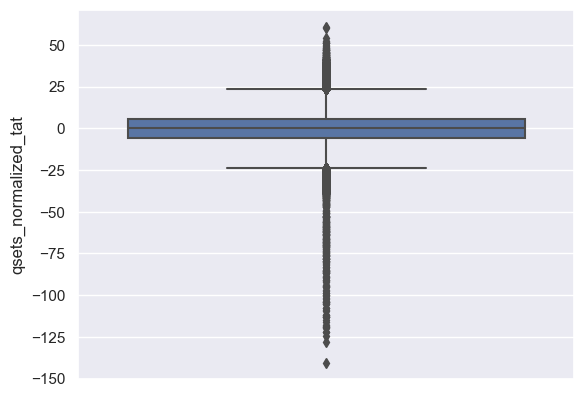

In [36]:
# Checking Outliers in Qsets.

sns.boxplot(y = "qsets_normalized_tat", data = qsets)
plt.show()

In [37]:
# Checking Missing Values in Qsets.

print(qsets.isnull().sum())
print("*" * 50)
print(qsets.isnull().sum()/len(qsets) *100)

id                           0
qsets_normalized_tat    103201
dtype: int64
**************************************************
id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64


- In Qsets dataset, 7% of data is missing.
- Since there is 7% of data missing, we will impute the missing values instead of removing it.
- Since there are outliers in the data, we can go by median value i.e "0.02" to impute the missing values but as we have been asked by Project Head we will impute with "0" which is nearer to median value itself.

In [38]:
# Imputing Missing Value in Qsets.

qsets.fillna(0, inplace = True)

In [39]:
print(qsets.isnull().sum())
print("*" * 50)
print(qsets.isnull().sum()/len(qsets) *100)

id                      0
qsets_normalized_tat    0
dtype: int64
**************************************************
id                      0.0
qsets_normalized_tat    0.0
dtype: float64


- The missing values are handled and now there are no missing values in Qsets.

In [40]:
# Checking Missing Values in Instance Dataset.

print(instance.isnull().sum())
print("*" * 50)
print(instance.isnull().sum()/len(instance) *100)

id                 0
instance_scores    0
dtype: int64
**************************************************
id                 0.0
instance_scores    0.0
dtype: float64


- In Instance Dataset, there is no missing values.

In [41]:
# Checking Missing Values in Lambdawts Dataset.

print(lambdawts.isnull().sum())
print("*" * 50)
print(lambdawts.isnull().sum()/len(lambdawts) *100)

Group        0
lambda_wt    0
dtype: int64
**************************************************
Group        0.0
lambda_wt    0.0
dtype: float64


- In Lambdawts Dataset, there is no missing values.

### Group "geo", "instance" and "qsets" based on "id".

- As we have seen earlier that "geo", "instance" and "qsets" have same "id" repeated multiple times. so, we will group them by their "id" taking mean values of their respected scores.

### 1. Grouping of "geo"

In [42]:
geo = geo.groupby("id").mean()

In [43]:
print("Geo shape before grouping :", 1424035)
print("Geo shape after grouping :", geo.shape)

Geo shape before grouping : 1424035
Geo shape after grouping : (284807, 1)


### 2. Grouping of "instance"

In [44]:
print("Instance shape before grouping :", instance.shape)

Instance shape before grouping : (1424035, 2)


In [45]:
instance = instance.groupby("id").mean()

In [46]:
print("Instance shape after grouping :", instance.shape)

Instance shape after grouping : (284807, 1)


### 3. Grouping of "qsets"

In [47]:
print("Qsets shape before grouping :", qsets.shape)

Qsets shape before grouping : (1424035, 2)


In [48]:
qsets = qsets.groupby("id").mean()

In [49]:
print("Qsets shape after grouping :", qsets.shape)

Qsets shape after grouping : (284807, 1)


- We have handled the repeated "ids" of the datasets "geo", "instance", "qsets" and made their shape to 284807 from 1424035.
- Also, the shape of the Train and Test dataset together is 284807. So, we can now merge all the datasets ("geo", "instance", "qsets", "train", "test") into one final dataset.

In [50]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


### Since we are concatenating train and test datasets we are adding one more variable "Data" to both train and test dataset to identify that the observations are from train dataset or test dataset.

In [51]:
train["Data"] = "train"

In [52]:
train.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0,train


In [53]:
test.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.570000,0.260000,0.70,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.910000,0.253333,1.04,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.86,1.006667,0.583333,0.616667,0.63,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200


In [54]:
test["Data"] = "test"

In [55]:
test.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Data
0,146574,Grp229,-0.300000,1.540000,0.22,-0.280000,0.570000,0.260000,0.70,1.076667,...,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,test
1,268759,Grp141,0.633333,0.953333,0.81,0.466667,0.910000,0.253333,1.04,0.550000,...,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,test
2,59727,Grp188,1.043333,0.740000,0.86,1.006667,0.583333,0.616667,0.63,0.686667,...,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,test


### Concatenating train and test datasets.

In [56]:
# Concatenating train and test datasets.

all_data = pd.concat([train, test], axis = 0)

In [57]:
all_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train


In [58]:
all_data.tail(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.050,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.315,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.450,NaN,test


In [59]:
print("all_data Shape :", all_data.shape)

all_data Shape : (284807, 29)


- Here, as we have concatenate both train and test datasets, the shape is now 284807. So, now we can merge all the other datasets into this "all_data" dataset.

## Merging all the Datasets.

### 1. Merging dataset "geo" to dataset "all_data" based on variable "id".

In [60]:
all_data = pd.merge(all_data, geo, on="id", how = "left")

In [61]:
all_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95


In [62]:
print("all_data Shape :", all_data.shape)

all_data Shape : (284807, 30)


### 2. Merging dataset "instance" to dataset "all_data" based on variable "id".

In [63]:
all_data = pd.merge(all_data, instance, on="id", how = "left")

In [64]:
all_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22,-0.06
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25,0.52
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95,1.56


In [65]:
print("all_data Shape :", all_data.shape)

all_data Shape : (284807, 31)


### 3. Merging dataset "qsets" to dataset "all_data" based on variable "id".

In [66]:
all_data = pd.merge(all_data, qsets, on="id", how = "left")

In [67]:
all_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22,-0.06,-0.70
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25,0.52,0.14
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95,1.56,-0.43


In [68]:
print("all_data Shape :", all_data.shape)

all_data Shape : (284807, 32)


### 4. Merging dataset "lambdawts" to dataset "all_data" based on variable "Group"

In [69]:
all_data = pd.merge(all_data, lambdawts, on="Group", how = "left")

In [70]:
all_data.head(3)

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.750,0.0,train,0.22,-0.06,-0.70,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.000,0.0,train,-0.25,0.52,0.14,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.125,0.0,train,-0.95,1.56,-0.43,-0.51


In [71]:
print("all_data Shape :", all_data.shape)

all_data Shape : (284807, 33)


### Segregating train and test dataset.

- After concatening train and test dataset for merging all the other datasets, we will now segregate the "all_data" dataset back to its original train and test datasets.

In [72]:
train = all_data[all_data["Data"] == "train"]
print("Train Shape :", train.shape)

Train Shape : (227845, 33)


In [73]:
test = all_data[all_data["Data"] == "test"]
print("Test Shape :", test.shape)

Test Shape : (56962, 33)


## Spliting the Data into Training and Testing

In [74]:
train.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,Data,geo_score,instance_scores,qsets_normalized_tat,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,0.22,-0.06,-0.70,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,-0.25,0.52,0.14,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.95,1.56,-0.43,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.49,0.70,-0.31,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.85,-0.47,-0.63,0.60


In [75]:
x_train = train.drop(["id", "Group", "Target", "Data"], axis=1)
y_train = train["Target"]

In [76]:
x_test = test.drop(["id", "Group", "Target", "Data"], axis=1)
y_test = test["Target"]

In [77]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227845 entries, 0 to 227844
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Per1                  227845 non-null  float64
 1   Per2                  227845 non-null  float64
 2   Per3                  227845 non-null  float64
 3   Per4                  227845 non-null  float64
 4   Per5                  227845 non-null  float64
 5   Per6                  227845 non-null  float64
 6   Per7                  227845 non-null  float64
 7   Per8                  227845 non-null  float64
 8   Per9                  227845 non-null  float64
 9   Dem1                  227845 non-null  float64
 10  Dem2                  227845 non-null  float64
 11  Dem3                  227845 non-null  float64
 12  Dem4                  227845 non-null  float64
 13  Dem5                  227845 non-null  float64
 14  Dem6                  227845 non-null  float64
 15  

- Here, in x_train dataset every feature has float as a datatype. So, encoding is not required here.

## Imbalance Treatment

In [78]:
print(y_train.value_counts())

0.0    227451
1.0       394
Name: Target, dtype: int64


In [79]:
Target_percent = y_train.value_counts(normalize = True)
print("Target Percentage :", Target_percent, sep = "\n\n")

Target Percentage :

0.0    0.998271
1.0    0.001729
Name: Target, dtype: float64


- The Dataset is clearly imbalanced having 0.1% of fraudulent data and rest 99% of non-fraudulent data.

In [80]:
# Making Balanced data from Imbalanced data using Oversampling Method. 

import imblearn

In [81]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
over_sampler = RandomOverSampler()
x_train_over, y_train_over = over_sampler.fit_resample(x_train, y_train)

In [83]:
print("y_train before oversampling :", y_train.value_counts(), sep = "\n\n")
print("###############"*5)
print("y_train after oversapmling :", y_train_over.value_counts(), sep = "\n\n")

y_train before oversampling :

0.0    227451
1.0       394
Name: Target, dtype: int64
###########################################################################
y_train after oversapmling :

0.0    227451
1.0    227451
Name: Target, dtype: int64


- Earlier the fraudulent data was 394 and after oversampling it has become equal to the non-fraudulent data.

In [84]:
print("y_train_over Shape :", y_train_over.shape)

y_train_over Shape : (454902,)


## Feature Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train_over)
x_test_scale = scaler.fit_transform(x_test)

In [87]:
x_train_scale

array([[ 0.63032818, -0.54869421,  0.4676835 , ...,  0.60234327,
         0.43674975,  0.70930203],
       [ 0.3210706 , -0.05956356,  0.65645045, ...,  0.72805308,
         0.57665455,  0.88069525],
       [ 0.66142671, -0.8895246 ,  0.68609155, ...,  0.95346379,
         0.48171915,  0.62685972],
       ...,
       [ 0.17939954,  0.20061231, -0.38722801, ..., -0.59189999,
         0.28851727, -1.69671163],
       [ 0.34007526, -0.19225326,  0.87329845, ...,  0.58066916,
         0.57332348,  1.06293614],
       [ 0.60786813, -0.19745678,  0.34131884, ...,  0.19703748,
         1.21455383, -0.22359777]])

# EDA - Exploratory Data Analysis

In [94]:
from ydata_profiling import ProfileReport

In [95]:
report = ProfileReport(all_data)
report.to_file(output_file = "eda_part.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Train Test Split for Model Building

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train_scale, y_train_over, test_size = 0.2, random_state = 101)

# Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [131]:
# Fitting and Training the data.

lr = LogisticRegression()
lr.fit(x_train1, y_train1)

LogisticRegression()

In [132]:
# predicting the data

y_pred_lr_train = lr.predict(x_train1)
y_pred_lr_test = lr.predict(x_test1)

In [133]:
# Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [147]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_lr_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_lr_test), sep = "\n")

Train Confusion Matrix :
[[177516   4495]
 [ 16111 165799]]

Test Confusion Matrix :
[[44300  1140]
 [ 4071 41470]]


In [150]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train1, y_pred_lr_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_lr_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    182011
         1.0       0.97      0.91      0.94    181910

    accuracy                           0.94    363921
   macro avg       0.95      0.94      0.94    363921
weighted avg       0.95      0.94      0.94    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94     45440
         1.0       0.97      0.91      0.94     45541

    accuracy                           0.94     90981
   macro avg       0.94      0.94      0.94     90981
weighted avg       0.94      0.94      0.94     90981



In [166]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_lr_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_lr_test))

Train Accuracy Score : 0.943377821010604
Test Accuracy Score : 0.942724305074686


- Since this is an imbalance dataset, we will not look at the accuracy part alone instead we will go by the precision, recall and f1-score value.
- By looking at the values of all the parameters, we can say that there is no overfiting and underfiting problem. 

In [167]:
# Cross Validation Technique

from sklearn.model_selection import cross_val_score

In [168]:
train_accuracy_cv = cross_val_score(lr, x_train1, y_train1, cv=10)
test_accuracy_cv = cross_val_score(lr, x_test1, y_test1, cv=10)

print("train_accuracy_cv :", train_accuracy_cv.mean())
print("*********************")
print("test_accuracy_cv :", test_accuracy_cv.mean())

train_accuracy_cv : 0.9433640850003181
*********************
test_accuracy_cv : 0.9424385302137154


# Naive Bayes

In [184]:
from sklearn.naive_bayes import BernoulliNB

In [185]:
# # Fitting and Training the data.

bnb = BernoulliNB()
bnb.fit(x_train1, y_train1)

# predicting the data
y_pred_bnb_train = bnb.predict(x_train1)
y_pred_bnb_test = bnb.predict(x_test1)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_bnb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_bnb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train1, y_pred_bnb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_bnb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_bnb_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_bnb_test))

Train Confusion Matrix :
[[180651   1360]
 [ 32722 149188]]

Test Confusion Matrix :
[[45123   317]
 [ 8239 37302]]

Train Classification Report :
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91    182011
         1.0       0.99      0.82      0.90    181910

    accuracy                           0.91    363921
   macro avg       0.92      0.91      0.91    363921
weighted avg       0.92      0.91      0.91    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     45440
         1.0       0.99      0.82      0.90     45541

    accuracy                           0.91     90981
   macro avg       0.92      0.91      0.91     90981
weighted avg       0.92      0.91      0.91     90981


Train Accuracy Score : 0.9063478062546542
Test Accuracy Score : 0.9059583869159494


# Decision Tree

In [152]:
# Fitting and Training the data.
# Criteria = gini

dt1 = DecisionTreeClassifier(criterion = "gini")
dt1.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [153]:
# predicting the data

y_pred_dt1_train = dt1.predict(x_train1)
y_pred_dt1_test = dt1.predict(x_test1)

In [154]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_dt1_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_dt1_test), sep = "\n")

Train Confusion Matrix :
[[182011      0]
 [     0 181910]]

Test Confusion Matrix :
[[45424    16]
 [    0 45541]]


In [155]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train1, y_pred_dt1_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_dt1_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182011
         1.0       1.00      1.00      1.00    181910

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [165]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_dt1_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_dt1_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9998241391059671


In [159]:
# Fitting and Training the data.
# Criteria = entropy

dt2 = DecisionTreeClassifier(criterion = "gini")
dt2.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [160]:
# predicting the data

y_pred_dt2_train = dt2.predict(x_train1)
y_pred_dt2_test = dt2.predict(x_test1)

In [161]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_dt2_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_dt2_test), sep = "\n")

Train Confusion Matrix :
[[182011      0]
 [     0 181910]]

Test Confusion Matrix :
[[45419    21]
 [    0 45541]]


In [162]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train1, y_pred_dt2_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_dt2_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182011
         1.0       1.00      1.00      1.00    181910

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [164]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_dt2_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_dt2_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9997691825765819


# Random Forest

In [169]:
# # Fitting and Training the data.

rf = RandomForestClassifier()
rf.fit(x_train1, y_train1)

RandomForestClassifier()

In [170]:
# predicting the data

y_pred_rf_train = rf.predict(x_train1)
y_pred_rf_test = rf.predict(x_test1)

In [171]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_rf_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_rf_test), sep = "\n")

Train Confusion Matrix :
[[182011      0]
 [     0 181910]]

Test Confusion Matrix :
[[45434     6]
 [    0 45541]]


In [172]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train1, y_pred_rf_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_rf_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182011
         1.0       1.00      1.00      1.00    181910

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [173]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_rf_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_rf_test))

Train Accuracy Score : 1.0
Test Accuracy Score : 0.9999340521647377


# Bagging Classifier

In [174]:
# # Fitting and Training the data.

bag = BaggingClassifier()
bag.fit(x_train1, y_train1)

BaggingClassifier()

In [175]:
# predicting the data

y_pred_bag_train = bag.predict(x_train1)
y_pred_bag_test = bag.predict(x_test1)

In [176]:
# Checking Train and Test Confusion Matrix.

print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_bag_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_bag_test), sep = "\n")

Train Confusion Matrix :
[[182007      4]
 [     0 181910]]

Test Confusion Matrix :
[[45430    10]
 [    0 45541]]


In [177]:
# Checking Train and Test Classification Report.

print("Train Classification Report :", classification_report(y_train1, y_pred_bag_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_bag_test), sep = "\n")

Train Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182011
         1.0       1.00      1.00      1.00    181910

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [178]:
# Checking Train and Test Accuracy Score.

print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_bag_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_bag_test))

Train Accuracy Score : 0.9999890086035156
Test Accuracy Score : 0.9998900869412295


# Gradient Boosting

In [181]:
# # Fitting and Training the data.

gdb = GradientBoostingClassifier()
gdb.fit(x_train1, y_train1)

# predicting the data
y_pred_gdb_train = gdb.predict(x_train1)
y_pred_gdb_test = gdb.predict(x_test1)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_gdb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_gdb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train1, y_pred_gdb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_gdb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_gdb_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_gdb_test))

Train Confusion Matrix :
[[180633   1378]
 [  1388 180522]]

Test Confusion Matrix :
[[45114   326]
 [  377 45164]]

Train Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182011
         1.0       0.99      0.99      0.99    181910

    accuracy                           0.99    363921
   macro avg       0.99      0.99      0.99    363921
weighted avg       0.99      0.99      0.99    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     45440
         1.0       0.99      0.99      0.99     45541

    accuracy                           0.99     90981
   macro avg       0.99      0.99      0.99     90981
weighted avg       0.99      0.99      0.99     90981


Train Accuracy Score : 0.9923994493310361
Test Accuracy Score : 0.9922731119684329


# Ada Boost

In [182]:
# # Fitting and Training the data.

ada = AdaBoostClassifier()
ada.fit(x_train1, y_train1)

# predicting the data
y_pred_ada_train = ada.predict(x_train1)
y_pred_ada_test = ada.predict(x_test1)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_ada_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_ada_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train1, y_pred_ada_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_ada_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_ada_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_ada_test))

Train Confusion Matrix :
[[178623   3388]
 [  7419 174491]]

Test Confusion Matrix :
[[44611   829]
 [ 1846 43695]]

Train Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97    182011
         1.0       0.98      0.96      0.97    181910

    accuracy                           0.97    363921
   macro avg       0.97      0.97      0.97    363921
weighted avg       0.97      0.97      0.97    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     45440
         1.0       0.98      0.96      0.97     45541

    accuracy                           0.97     90981
   macro avg       0.97      0.97      0.97     90981
weighted avg       0.97      0.97      0.97     90981


Train Accuracy Score : 0.9703039945482673
Test Accuracy Score : 0.9705982567788879


# XG Boost

In [183]:
# # Fitting and Training the data.

xgb = XGBClassifier()
xgb.fit(x_train1, y_train1)

# predicting the data
y_pred_xgb_train = xgb.predict(x_train1)
y_pred_xgb_test = xgb.predict(x_test1)

# Checking Train and Test Confusion Matrix.
print("Train Confusion Matrix :", confusion_matrix(y_train1, y_pred_xgb_train), sep = "\n", end = "\n\n")
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_xgb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Train Classification Report :", classification_report(y_train1, y_pred_xgb_train), sep = "\n", end = "\n\n")
print("Test Classification Report :", classification_report(y_test1, y_pred_xgb_test), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Train Accuracy Score :", accuracy_score(y_train1, y_pred_xgb_train))
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_xgb_test))

Train Confusion Matrix :
[[182011      0]
 [     0 181910]]

Test Confusion Matrix :
[[45434     6]
 [    0 45541]]

Train Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182011
         1.0       1.00      1.00      1.00    181910

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981


Train Accuracy Score : 1.0
Test Accuracy Score : 0.9999340521647377


# Voting Classifier

In [188]:
voting = VotingClassifier([('lr', lr),('dt1', dt1),('dt2', dt2),('rf', rf),('bag', bag),
                           ('ada', ada),('gdb', gdb),('xgb', xgb)], weights =[1,1,1,1,1,1,1,1])

# Fitting and Training the data.
voting.fit(x_train1, y_train1)

# predicting the data
y_pred_voting = voting.predict(x_test1)

# Checking Train and Test Confusion Matrix.
print("Test Confusion Matrix :", confusion_matrix(y_test1, y_pred_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Classification Report.
print("Test Classification Report :", classification_report(y_test1, y_pred_voting), sep = "\n", end = "\n\n")

# Checking Train and Test Accuracy Score.
print("Test Accuracy Score :", accuracy_score(y_test1, y_pred_voting))

Test Confusion Matrix :
[[45433     7]
 [    0 45541]]

Test Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45440
         1.0       1.00      1.00      1.00     45541

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981


Test Accuracy Score : 0.9999230608588606
